**Exploratory Data Analysis on Facebook Utilization Data**

Dataset : Facebook user data


Source : https://docs.google.com/spreadsheets/d/1PHNL0qC1qCvVsN9vZMKEPo1cg5CmNB4JmYoCQcfVR3g/edit?usp=sharing

Data Description :

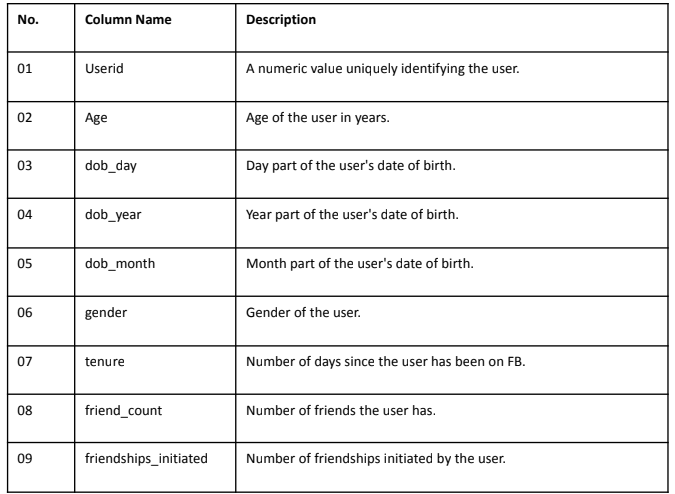

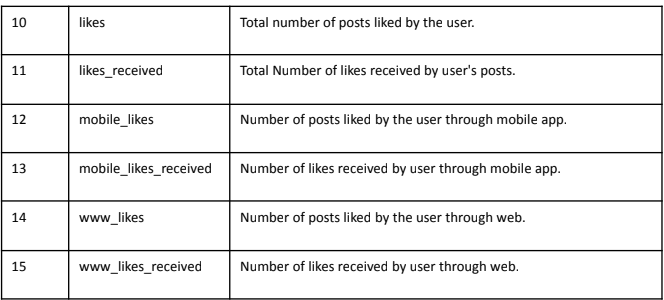

1. Load Data and Imputing missing values

In [ ]:
import pandas as pd
import numpy as np

user_data_sheet_id =  '1PHNL0qC1qCvVsN9vZMKEPo1cg5CmNB4JmYoCQcfVR3g'

user_data = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{user_data_sheet_id}/export?format=csv")
user_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
#checking shape of data
user_data.shape

(99003, 15)

In [ ]:
#checking missing values
missing_values_count = user_data.isnull().sum()
missing_values_count

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

*So, we find that 'gender' and 'tenure' columns have 175 and 2 missing values respectively.*

In [ ]:
#percentage of missing values
num_cells = np.product(user_data.shape)
num_missing = missing_values_count.sum()

percentage_missing = (num_missing/num_cells) * 100
percentage_missing

0.011918830742502754

*Since the percentage of missing values is very small, we could have also removed the records with missing values, but as we want to impute them, we'll go about it depending on the nature of feature* 

In [ ]:
#checking unique values in gender column
user_data['gender'].unique()

array(['male', 'female', nan], dtype=object)



*   Replacing the null values (NA) of gender column

        *   We impute null values in a categorical column with mode, even if the
            categorical column has numerical categories(for example -on a scale
            of 1 to 5), because mode is the most frequent data and it gives a 
            value that better describes the data. While, 
        *   Mean and median can be misleading in this case. Suppose there is a
            column for rating of a product (1 star to 5 star), if we take its 
            mean or median to impute then it will be quite misleading, but mode
            will give the better picture by imputing it with most frequent
            rating





In [ ]:
'''we will use mode to replace null values of gender column as it is a 
categorical feature and mode will impute the most frequent gender in nan places'''

user_data['gender'] = user_data['gender'].fillna(user_data['gender'].mode()[0])
user_data['gender'].unique()

array(['male', 'female'], dtype=object)

*So we notice in the above output that when we have successfully imputed the null values for 'gender' column.*



*   Replacing the null values (NA) of tenure column

      *   Basically, for numerical values either mode or median is preferred for
          imputing the missing values because they represent the numerical data
          better, so the chances of adding defects are miniscule. 
          Mean can be a bit misleading at times if the data has extreme points.






In [ ]:
'''we will use median to impute null values of tenure column as it is a numerical
variable'''

user_data['tenure'] = user_data['tenure'].fillna(user_data['tenure'].median())
user_data['tenure'].isnull().any()

False

*Output is false which means we have successfully imputed the null values with median of 'tenure' column.*

2. Plot heatmap / correlation matrix on all the columns.

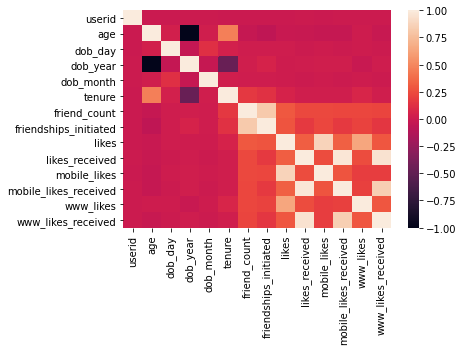

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(user_data.corr())
plt.show()

*'dob_year and 'age' seem to be highly correlated but that's obvious because they give the same kind of information, so there's redundancy there!*

3. Analysis based on gender of the users



          *   What is composition of male and female users?



In [ ]:
#checking the number of male and female users
user_data['gender'].value_counts()

male      58749
female    40254
Name: gender, dtype: int64

In [ ]:
#checking the composition based on percentage
percent_females = np.sum(user_data['gender'] == 'female')/len(user_data['gender']) * 100
print(f"Percentage of females is: {round(percent_females,2)} and Percentage of males is {round(100 - percent_females, 2)}")

Percentage of females is: 40.66 and Percentage of males is 59.34




        *   Which category of gender has more friends?



In [ ]:
num_friends_of_females = user_data[user_data['gender'] == 'female']['friend_count'].sum()
num_friends_of_males = user_data[user_data['gender'] == 'male']['friend_count'].sum()

if num_friends_of_females > num_friends_of_males:
  print("Female category has more friends")

elif num_friends_of_females < num_friends_of_males:
  print("Male category has more friends")

else:
  print("Both categories have equal number of friends")

Female category has more friends


*So we find that 'female' category has more friends.*

          * Which category of gender initiated more friendships?

In [ ]:
num_init_by_females = user_data[user_data['gender'] == 'female']['friendships_initiated'].sum()
num_init_by_males  = user_data[user_data['gender'] == 'male']['friendships_initiated'].sum()

if num_init_by_females > num_init_by_males:
  print("Female category has initated more friendships")

elif num_init_by_females < num_init_by_males:
  print("Male category has initiated more friendships")

else:
  print("Both categories have initiated an equal number of friendships")

Male category has initiated more friendships


*So we find that 'male' category has intiated more friendships.*

        * What is the distribution of tenure across different categories of gender?



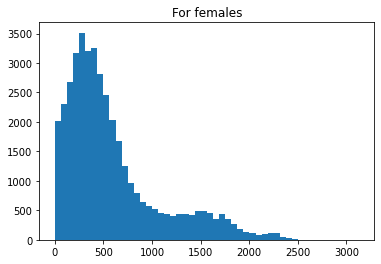

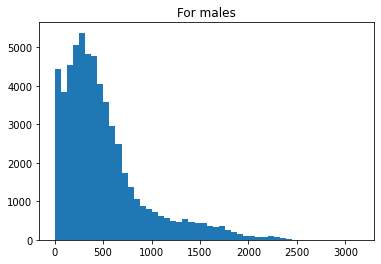

In [ ]:
#we plot histograms for checking distribution
#first for females
dist_females = user_data[user_data['gender'] == 'female']['tenure']
plt.title("For females")
plt.hist(dist_females, bins = 50)
plt.show()
#for males
dist_males = user_data[user_data['gender'] == 'male']['tenure']
plt.title("For males")
plt.hist(dist_males, bins = 50)

plt.show()

*Most males have < = 250 friends*

*Most females have < = 300 friends*

4. Analysis based on the least active users on Facebook

        * How many users have no friends?

In [ ]:
user_data[user_data['friend_count'] == 0]['userid'].count()

1962

*1962 users have  no friends.*

        * How many users did not like any posts?

In [ ]:
user_data[user_data['likes'] == 0]['userid'].count()

22308

*22308 users did not like any post.*

        * How many users did not receive any likes?

In [ ]:
user_data[user_data['likes_received'] == 0]['userid'].count()

24428

*24428 users did not receive any likes.*

5. Analysis based on the user accessibility (Mobile Devices vs. Web Devices)

        * What is the average number of posts liked by users (based on gender) through web vs. mobile devices?

In [ ]:
gender_wise = user_data.groupby("gender")
#for web
web_avg = gender_wise['www_likes'].mean()
print(f"Average num of posts liked through web based on {web_avg}")

#for mobile devices
mobile_avg = gender_wise['mobile_likes'].mean()
print(f"\nAverage num of posts liked through mobile devices based on {mobile_avg}")

Average num of posts liked through web based on gender
female    87.138297
male      24.490034
Name: www_likes, dtype: float64

Average num of posts liked through mobile devices based on gender
female    172.912928
male       60.348176
Name: mobile_likes, dtype: float64


          * What is the average number of likes received by users (based on gender) through web vs. mobile devices?

In [ ]:
#for web
avg_web_likes_received = gender_wise['www_likes_received'].mean()
print(f"Average num of likes received through web based on {avg_web_likes_received}")

#for mobile devices
avg_mobile_likes_received = gender_wise['mobile_likes_received'].mean()
print(f"\nAverage num of likes received through mobile devices based on {avg_mobile_likes_received}")

Average num of likes received through web based on gender
female    104.334451
male       27.210863
Name: www_likes_received, dtype: float64

Average num of likes received through mobile devices based on gender
female    147.100884
male       40.967199
Name: mobile_likes_received, dtype: float64
